1. Upload data from data4.csv to pandas DataFrame and display the first 5 rows

---



In [35]:
import pandas as pd

df = pd.read_csv('/content/sample_data/data4.csv')
print(df.head())


   year   month carrier       carrier_name airport  \
0  2020       9      9E  Endeavor Air Inc.     ABY   
1  2020       9      9E  Endeavor Air Inc.     ACK   
2  2020       9      9E  Endeavor Air Inc.     AEX   
3  2020       9      9E  Endeavor Air Inc.     AGS   
4  2020       9      9E  Endeavor Air Inc.     ALB   

                                  airport_name  arr_flights  arr_del15  \
0       Albany, GA: Southwest Georgia Regional         60.0        3.0   
1            Nantucket, MA: Nantucket Memorial          4.0        0.0   
2     Alexandria, LA: Alexandria International         60.0        5.0   
3  Augusta, GA: Augusta Regional at Bush Field        121.0        3.0   
4             Albany, NY: Albany International         88.0        4.0   

   carrier_ct   weather_ct  ...  late_aircraft_ct  arr_cancelled  \
0        1.00          0.0  ...               0.0            0.0   
1        0.00          0.0  ...               0.0            0.0   
2        4.84          0.0

2. Delete the last column and display the names of all columns

In [34]:
df = df.iloc[:, :-1]
print(df.columns)


Index([], dtype='object')


3. Calculate the frequency table [number of airports for each carrier] by carrier column (flight carrier company). Sort it in descending order by values

In [18]:
carrier_counts = df['carrier'].value_counts().sort_values(ascending=False)
print(carrier_counts)


OO    226
MQ    140
G4    118
DL    115
AA     98
YV     95
9E     94
F9     92
WN     89
OH     89
UA     77
YX     74
AS     64
B6     52
NK     47
EV     42
HA     11
Name: carrier, dtype: int64


4. Calculate the number of cancelled arrivals (use 'are_cancelled') for each 'carrier. Sort the result in descending order (by values)

In [19]:
cancelled_counts = df.groupby('carrier')['arr_cancelled'].sum().sort_values(ascending=False)
print(cancelled_counts)


carrier
WN    443.0
OO    393.0
AA    169.0
OH    124.0
YV    117.0
MQ    105.0
G4     80.0
DL     76.0
AS     61.0
B6     58.0
EV     54.0
UA     53.0
9E     46.0
YX     15.0
F9      8.0
HA      3.0
NK      0.0
Name: arr_cancelled, dtype: float64


5. Using the previous calculations from paragraphs 3-4, create a scatter plot (x-axis - the number of airports for each carrier; y-axis - the number of canceled flights for each carrier).

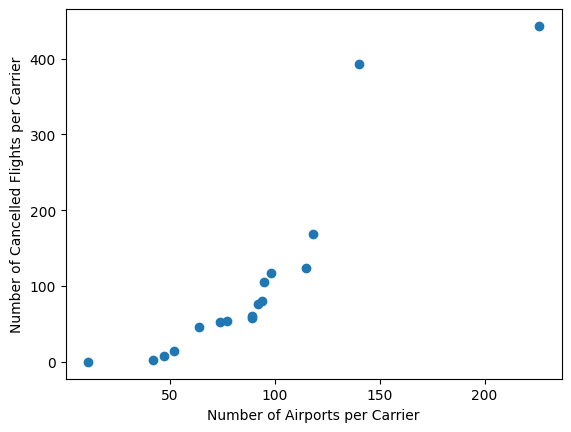

In [20]:
import matplotlib.pyplot as plt

plt.scatter(carrier_counts, cancelled_counts)
plt.xlabel('Number of Airports per Carrier')
plt.ylabel('Number of Cancelled Flights per Carrier')
plt.show()


6. The dataset contains 5 columns with several types of flight delays (measured in minutes), which are aggregated in the arr_delay column. Calculate the fractions of each type of delay (for the entire dataset) and create a pie chart.

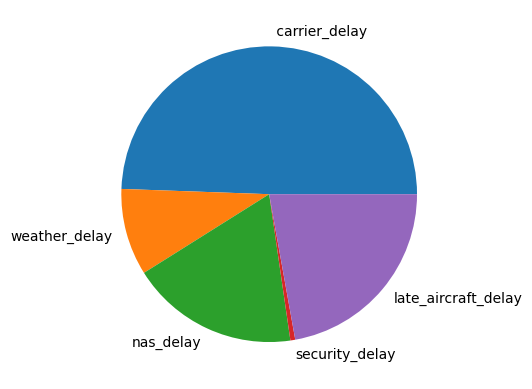

In [25]:
delay_columns = [' carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']
delays = df[delay_columns].sum()
delays.plot(kind='pie')
plt.show()


7. Calculate the number of airports that are served by more than 2 carriers

In [26]:
carriers_per_airport = df.groupby('airport')['carrier'].nunique()
airports_with_multiple_carriers = carriers_per_airport[carriers_per_airport > 2].count()
print(airports_with_multiple_carriers)


177


8. Find out the most common word that is used in airport names. Hint: Remove commas and colons; then separate by spaces

In [28]:
import re
from collections import Counter

airport_names = df['airport_name']
words = Counter(" ".join(airport_names.str.replace('[,;]', '', regex=True)).split())
most_common_word = words.most_common(1)
print(most_common_word)


[('International', 982)]


9. Calculate the average delay due to the weather (in hours) and the percentage of delay due to the weather in avr_delay for each carrier_name. Make one table sorted by carrier_name from A to Z.

In [31]:
df['weather_delay_hours'] = df['weather_delay'] / 60
mean_weather_delay = df.groupby('carrier_name')['weather_delay_hours'].mean()
weather_delay_share = df.groupby('carrier_name').apply(lambda x: x['weather_delay'].sum() / x[' arr_delay'].sum())
result_table = pd.DataFrame({'Mean Weather Delay (hours)': mean_weather_delay, 'Share of Weather Delay': weather_delay_share})
result_table.sort_index(inplace=True)
print(result_table)
 

                         Mean Weather Delay (hours)  Share of Weather Delay
carrier_name                                                               
Alaska Airlines Inc.                       0.342708                0.052527
Allegiant Air                              1.075424                0.162007
American Airlines Inc.                     2.628401                0.078945
Delta Air Lines Inc.                       1.143333                0.063624
Endeavor Air Inc.                          0.317376                0.047657
Envoy Air                                  1.549048                0.145842
ExpressJet Airlines LLC                    0.039024                0.013176
Frontier Airlines Inc.                     0.118659                0.030837
Hawaiian Airlines Inc.                     0.000000                0.000000
JetBlue Airways                            0.139744                0.027012
Mesa Airlines Inc.                         1.780000                0.158210
PSA Airlines